 Load a dataset (e.g., the Boston Housing dataset from Scikit-Learn) and prepare the data for linear regression (e.g., split into training and testing sets).

In [21]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)
print(X.isnull().sum())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


Implement linear regression using Scikit-Learn. Fit the model to the training data.

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict the target variable for the test set using the fitted linear regression model.

In [23]:
y_pred = model.predict(X_test)
print(f"Predictions for the test set: {y_pred}")


Predictions for the test set: [0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


Calculate the Mean Squared Error (MSE) of the linear regression model on the test set.


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.555891598695244


Calculate the R-squared value of the linear regression model on the test set.

In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 0.5757877060324511


Plot the regression line along with the actual data points to visually assess the model's performance.

Intercept: 2.067862309508389
Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]


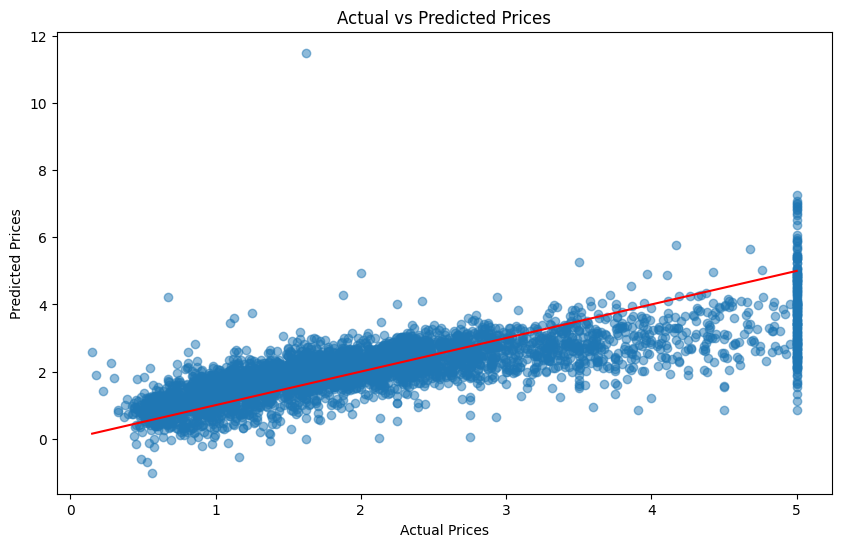

In [26]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Evaluate the model's performance by comparing the predicted values with the actual values. Create a scatter plot of the predicted vs. actual values.


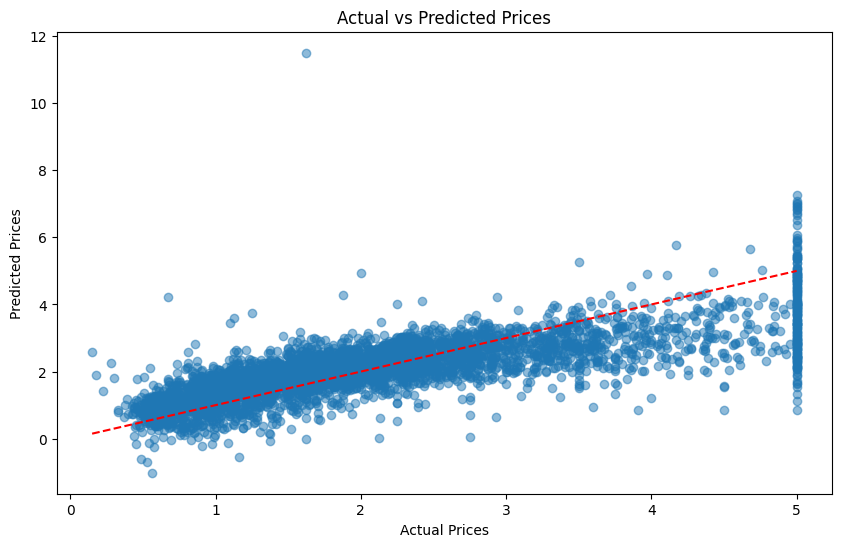

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

Interpret the coefficients of the linear regression model. Explain the impact of each feature on the target variable.

In [28]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
coefficients = pd.DataFrame({'Feature': california.feature_names, 'Coefficient': model.coef_})
print(coefficients)
#In the y=mx+c equation c is the intercept
#Coefficients: in case of positive value it indicates with increasing value it has more price and with negative value of coefficient increasing value it has low price.
#In my opinion with increasing houseage the price must be less but it has shown wrong coefficient

Intercept: 2.067862309508389
Coefficients: [ 0.85238169  0.12238224 -0.30511591  0.37113188 -0.00229841 -0.03662363
 -0.89663505 -0.86892682]
      Feature  Coefficient
0      MedInc     0.852382
1    HouseAge     0.122382
2    AveRooms    -0.305116
3   AveBedrms     0.371132
4  Population    -0.002298
5    AveOccup    -0.036624
6    Latitude    -0.896635
7   Longitude    -0.868927
